# **ANN on CIFAR-10 Dataset**

## **Importing libraries**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization, Activation, Flatten
from tensorflow.keras.optimizers import Adam



In [8]:
print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.0


## **Load the dataset**


In [9]:
from keras.datasets import cifar10

## **Split the Data into Train and Test**

In [10]:
(x_train, y_train),(x_test,y_test) = cifar10.load_data()

In [11]:
print("Shape of Training data : ")
print(x_train.shape)
print(y_train.shape)

print("Shape of Testing data : ")
print(x_test.shape)
print(y_test.shape)

Shape of Training data : 
(50000, 32, 32, 3)
(50000, 1)
Shape of Testing data : 
(10000, 32, 32, 3)
(10000, 1)


In [12]:
print("Number of training examples :", x_train.shape[0], "and each image is of shape (%d, %d)"%(x_train.shape[1], x_train.shape[2]))
print("Number of test examples :", x_test.shape[0], "and each image is of shape (%d, %d)"%(x_test.shape[1], x_test.shape[2]))

Number of training examples : 50000 and each image is of shape (32, 32)
Number of test examples : 10000 and each image is of shape (32, 32)


In [13]:
# An example data point
print(x_train[0])
print(x_train.shape)

print("*" * 70)

print(y_train[0])
print(y_train.shape)

print("*" * 70)

print(x_test[0])
print(x_test.shape)


print("*" * 70)

print(y_test[0])
print(y_test.shape)


[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
(50000, 32, 32, 3)
**********************************************************************
[6]
(50000, 1)
**********************************************************************
[[[158 112  49]
  [159 111  47]
  [165 116  51]
  ...
  [137  95  36]
  [126  91  36]
  [116  85  33]]

 [[152 112  51]
  [151 110  40]
  [159 114  45]
  ...
  [136  95  31]
  [125  91  32]
  [1

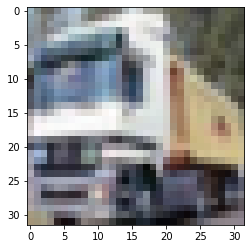

In [14]:
plt.imshow(x_train[1])

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


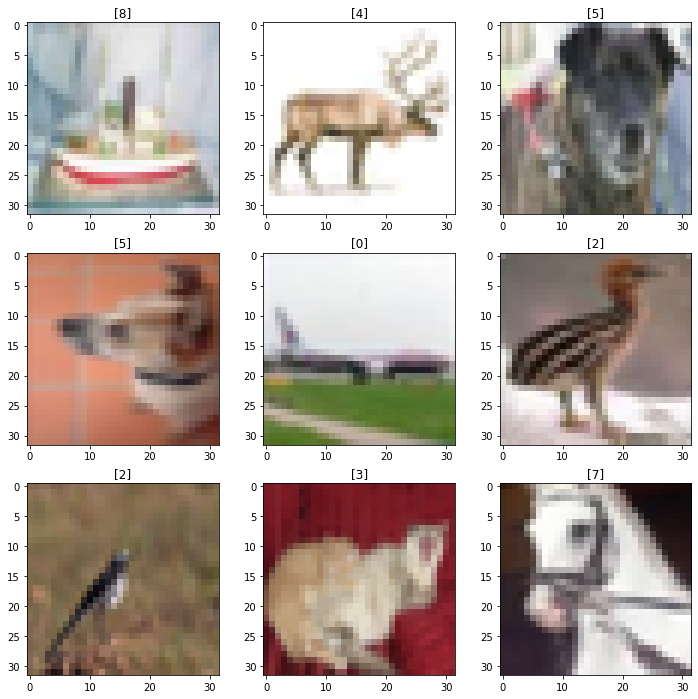

In [15]:
plt.figure(figsize=(12, 12))
np.random.seed(0)
idx = np.random.randint(0, 50000, 9)

for i in range(len(idx)):
    plt.subplot(3, 3, i+1)
    plt.title(y_train[idx[i]])
    grid_data = np.reshape(x_train[idx[i]], (32,32,3))
    plt.imshow(grid_data, cmap='gray')

In [16]:
### data preprocessing

In [17]:
x_train = x_train/255.0
x_test = x_test/255.0

In [18]:
import numpy as np

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


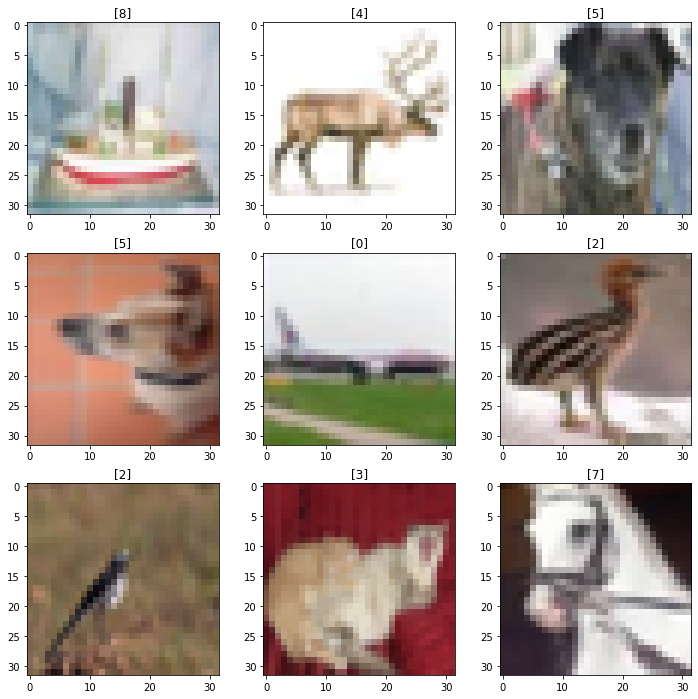

In [19]:
plt.figure(figsize=(12, 12))
np.random.seed(0)
idx = np.random.randint(0, 50000, 9)

for i in range(len(idx)):
    plt.subplot(3, 3, i+1)
    plt.title(y_train[idx[i]])
    grid_data = np.reshape(x_train[idx[i]], (32,32,3))
    plt.imshow(grid_data, cmap='gray')

In [20]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [21]:
num_classes = y_train.max()+1 #10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [22]:
y_train.shape,y_test.shape

((50000, 10), (10000, 10))

In [23]:
x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [24]:
# reshape for model  # flatterning
x_train  = x_train.reshape(x_train.shape[0],-1)
x_test  = x_test.reshape(x_test.shape[0],-1)

In [25]:
x_train.shape,x_test.shape

((50000, 3072), (10000, 3072))

In [26]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras import optimizers

In [27]:
model = Sequential()
model.add(Dense(50,input_shape=(3072,),activation='sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [28]:
(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                153650    
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0

In [29]:
sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [30]:
model.fit(x_train,y_train,batch_size=256,epochs=100,verbose=1)

Epoch 1/100
196/196 [==============================] - 2s 3ms/step - loss: 2.3723 - accuracy: 0.0983
Epoch 2/100
196/196 [==============================] - 1s 4ms/step - loss: 2.3022 - accuracy: 0.1062
Epoch 3/100
196/196 [==============================] - 1s 3ms/step - loss: 2.3015 - accuracy: 0.1156
Epoch 4/100
196/196 [==============================] - 1s 4ms/step - loss: 2.3008 - accuracy: 0.1095
Epoch 5/100
196/196 [==============================] - 1s 3ms/step - loss: 2.3003 - accuracy: 0.1271
Epoch 6/100
196/196 [==============================] - 1s 4ms/step - loss: 2.2995 - accuracy: 0.1311
Epoch 7/100
196/196 [==============================] - 1s 4ms/step - loss: 2.2989 - accuracy: 0.1425
Epoch 8/100
196/196 [==============================] - 1s 4ms/step - loss: 2.2982 - accuracy: 0.1351
Epoch 9/100
196/196 [==============================] - 1s 4ms/step - loss: 2.2976 - accuracy: 0.1517
Epoch 10/100
196/196 [==============================] - 1s 4ms/step - loss: 2.2968 - accura

In [31]:
results = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.9694 - accuracy: 0.2699


## optimiser ADAM

In [32]:
adam = optimizers.Adam(lr=0.01)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
model.fit(x_train,y_train,batch_size=256,epochs=100,verbose=0)

In [34]:
results = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.0987 - accuracy: 0.1773


In [35]:
results

[2.0987050533294678, 0.17730000615119934]

In [36]:
y_pred = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [37]:
y_pred

array([6, 8, 8, ..., 6, 6, 6])

## changing the learning rates

In [38]:
 # for adam optimiser
 l_rate = [0.001,0.01,0.1,1,10]
 for lr in range(len(l_rate)):
   adam = optimizers.Adam(lr=l_rate[lr])
   model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
   model.fit(x_train,y_train,batch_size=256,epochs=100,verbose=0)
   results = model.evaluate(x_test,y_test)
   print(f"with learning rate {l_rate[lr]} \nloss : {results[0]}\nAccuracy : {results[1]}")

313/313 [==============================] - 1s 2ms/step - loss: 1.7244 - accuracy: 0.3745
with learning rate 0.001 
loss : 1.7243820428848267
Accuracy : 0.37450000643730164
313/313 [==============================] - 1s 2ms/step - loss: 1.8826 - accuracy: 0.3383
with learning rate 0.01 
loss : 1.8825628757476807
Accuracy : 0.3382999897003174
313/313 [==============================] - 1s 2ms/step - loss: 2.3146 - accuracy: 0.1000
with learning rate 0.1 
loss : 2.3145864009857178
Accuracy : 0.10000000149011612
313/313 [==============================] - 1s 2ms/step - loss: 2.3615 - accuracy: 0.1000
with learning rate 1 
loss : 2.361529588699341
Accuracy : 0.10000000149011612
313/313 [==============================] - 1s 2ms/step - loss: 17.2834 - accuracy: 0.1000
with learning rate 10 
loss : 17.283437728881836
Accuracy : 0.10000000149011612


In [39]:
 # for SGD optimiser
 l_rate = [0.001,0.01,0.1,1,10]
 for lr in range(len(l_rate)):
   sgd = optimizers.SGD(lr=l_rate[lr])
   model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
   model.fit(x_train,y_train,batch_size=256,epochs=100,verbose=0)
   results = model.evaluate(x_test,y_test)
   print(f"with learning rate {l_rate[lr]}\nloss : {results[0]}\nAccuracy : {results[1]}")

313/313 [==============================] - 1s 2ms/step - loss: 2.8719 - accuracy: 0.1000
with learning rate 0.001
loss : 2.871868371963501
Accuracy : 0.10000000149011612
313/313 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1000
with learning rate 0.01
loss : 2.302586555480957
Accuracy : 0.10000000149011612
313/313 [==============================] - 1s 2ms/step - loss: 2.3030 - accuracy: 0.1000
with learning rate 0.1
loss : 2.3030245304107666
Accuracy : 0.10000000149011612
313/313 [==============================] - 1s 2ms/step - loss: 2.3089 - accuracy: 0.1000
with learning rate 1
loss : 2.308938980102539
Accuracy : 0.10000000149011612
313/313 [==============================] - 1s 2ms/step - loss: 9.0799 - accuracy: 0.1000
with learning rate 10
loss : 9.079913139343262
Accuracy : 0.10000000149011612


## Build a simple network with 2 dense layers

In [40]:
model = None
model =  Sequential()
model.add(Dense(2,activation='relu',input_shape=(3072,)))
model.add(Dense(10,activation='softmax'))

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 2)                 6146      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                30        
Total params: 6,176
Trainable params: 6,176
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [43]:
model.fit(x_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
391/391 [==============================] - 1s 3ms/step - loss: 2.3031 - accuracy: 0.0975
Epoch 2/10
391/391 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.0979
Epoch 3/10
391/391 [==============================] - 1s 3ms/step - loss: 2.3027 - accuracy: 0.1004
Epoch 4/10
391/391 [==============================] - 1s 3ms/step - loss: 2.3027 - accuracy: 0.1002
Epoch 5/10
391/391 [==============================] - 1s 3ms/step - loss: 2.3027 - accuracy: 0.0983
Epoch 6/10
391/391 [==============================] - 1s 3ms/step - loss: 2.3027 - accuracy: 0.0969
Epoch 7/10
391/391 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.0989
Epoch 8/10
391/391 [==============================] - 1s 2ms/step - loss: 2.3027 - accuracy: 0.1001
Epoch 9/10
391/391 [==============================] - 1s 3ms/step - loss: 2.3027 - accuracy: 0.0985
Epoch 10/10
391/391 [==============================] - 1s 2ms/step - loss: 2.3027 - accuracy: 0.0984

In [44]:
results = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1000


In [45]:
print(f"loss : {results[0]}\nAccuracy : {results[1]}")

loss : 2.302603006362915
Accuracy : 0.10000000149011612


###  Increase the dense layer by 2 with changing activations functions (‘selu’, ’softplus’, ’elu’, ’relu’)


In [46]:
model = None
model = Sequential()
model.add(Dense(2,input_shape=(3072,),activation='selu'))
model.add(Dense(4,activation='softplus'))
model.add(Dense(6,activation='elu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 2)                 6146      
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 56        
_________________________________________________________________
dense_10 (Dense)             (None, 10)                90        
Total params: 6,334
Trainable params: 6,334
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [49]:
model.fit(x_train,y_train,batch_size=128,epochs=10,verbose=0)

In [50]:
results = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.0032 - accuracy: 0.2049


In [51]:
print(f"loss : {results[0]}\nAccuracy : {results[1]}")

loss : 2.0032477378845215
Accuracy : 0.20489999651908875


### Stochastic Gradient Descent

In [52]:
#1
sgd = optimizers.SGD()

In [53]:
model = None
model = Sequential()
model.add(Dense(2,input_shape=(3072,),activation='selu'))
model.add(Dense(4,activation='softplus'))
model.add(Dense(6,activation='elu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [54]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 2)                 6146      
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_13 (Dense)             (None, 6)                 30        
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 56        
_________________________________________________________________
dense_15 (Dense)             (None, 10)                90        
Total params: 6,334
Trainable params: 6,334
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [56]:
model.fit(x_train,y_train,batch_size=128,epochs=10,verbose=1)

Epoch 1/10
391/391 [==============================] - 1s 3ms/step - loss: 2.3041 - accuracy: 0.1089
Epoch 2/10
391/391 [==============================] - 1s 3ms/step - loss: 2.2836 - accuracy: 0.1484
Epoch 3/10
391/391 [==============================] - 1s 3ms/step - loss: 2.2692 - accuracy: 0.1656
Epoch 4/10
391/391 [==============================] - 1s 3ms/step - loss: 2.2502 - accuracy: 0.1704
Epoch 5/10
391/391 [==============================] - 1s 3ms/step - loss: 2.2229 - accuracy: 0.1813
Epoch 6/10
391/391 [==============================] - 1s 3ms/step - loss: 2.1787 - accuracy: 0.2075
Epoch 7/10
391/391 [==============================] - 1s 3ms/step - loss: 2.1180 - accuracy: 0.2293
Epoch 8/10
391/391 [==============================] - 1s 3ms/step - loss: 2.0587 - accuracy: 0.2330
Epoch 9/10
391/391 [==============================] - 1s 3ms/step - loss: 2.0231 - accuracy: 0.2382
Epoch 10/10
391/391 [==============================] - 1s 3ms/step - loss: 1.9920 - accuracy: 0.2378

In [57]:
results = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.0143 - accuracy: 0.2251


In [58]:
print(f"loss : {results[0]}\nAccuracy : {results[1]}")

loss : 2.0143067836761475
Accuracy : 0.22509999573230743


In [59]:
#2 Nesterov Accelerated Gradient
model = None
model = Sequential()
model.add(Dense(2,input_shape=(3072,),activation='selu'))
model.add(Dense(4,activation='softplus'))
model.add(Dense(6,activation='elu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [60]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 2)                 6146      
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_18 (Dense)             (None, 6)                 30        
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 56        
_________________________________________________________________
dense_20 (Dense)             (None, 10)                90        
Total params: 6,334
Trainable params: 6,334
Non-trainable params: 0
_________________________________________________________________


In [61]:
nadam = optimizers.Nadam()

In [62]:
model.compile(optimizer=nadam,loss='categorical_crossentropy',metrics=['accuracy'])

In [63]:
model.fit(x_train,y_train,epochs=10,verbose=0,batch_size=128)

In [64]:
results = model.evaluate(x_test,y_test,)

313/313 [==============================] - 1s 2ms/step - loss: 2.0248 - accuracy: 0.1969


In [65]:
print(f"loss : {results[0]}\nAccuracy : {results[1]}")

loss : 2.024790048599243
Accuracy : 0.19689999520778656


In [66]:
#3 Adam
model = None
model = Sequential()
model.add(Dense(128,input_shape=(3072,),activation='selu'))
model.add(Dense(64,activation='softplus'))
model.add(Dense(32,activation='elu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [67]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_22 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_23 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_24 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_25 (Dense)             (None, 10)                170       
Total params: 404,378
Trainable params: 404,378
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics='accuracy')

In [69]:
model.fit(x_train,y_train,batch_size=128,epochs=20)

Epoch 1/20
391/391 [==============================] - 2s 3ms/step - loss: 2.1922 - accuracy: 0.1701
Epoch 2/20
391/391 [==============================] - 1s 3ms/step - loss: 1.8930 - accuracy: 0.3025
Epoch 3/20
391/391 [==============================] - 1s 3ms/step - loss: 1.7625 - accuracy: 0.3619
Epoch 4/20
391/391 [==============================] - 1s 3ms/step - loss: 1.6608 - accuracy: 0.4036
Epoch 5/20
391/391 [==============================] - 1s 3ms/step - loss: 1.5911 - accuracy: 0.4250
Epoch 6/20
391/391 [==============================] - 1s 3ms/step - loss: 1.5347 - accuracy: 0.4482
Epoch 7/20
391/391 [==============================] - 1s 3ms/step - loss: 1.5013 - accuracy: 0.4596
Epoch 8/20
391/391 [==============================] - 1s 3ms/step - loss: 1.4621 - accuracy: 0.4761
Epoch 9/20
391/391 [==============================] - 1s 3ms/step - loss: 1.4484 - accuracy: 0.4794
Epoch 10/20
391/391 [==============================] - 1s 3ms/step - loss: 1.4077 - accuracy: 0.4905

In [70]:
results = model.evaluate(x_test,y_test)
print(f"loss : {results[0]}\naccuracy : {results[1]}")

313/313 [==============================] - 1s 2ms/step - loss: 1.3940 - accuracy: 0.5046
loss : 1.3939999341964722
accuracy : 0.5045999884605408


In [71]:
#4 RMSprop

model = None
model = Sequential()
model.add(Dense(128,input_shape=(3072,),activation='selu'))
model.add(Dense(64,activation='softplus'))
model.add(Dense(32,activation='elu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [72]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_27 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_28 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_29 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_30 (Dense)             (None, 10)                170       
Total params: 404,378
Trainable params: 404,378
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.compile(loss='categorical_crossentropy',metrics="accuracy")

In [74]:
model.fit(x_train,y_train,epochs=10,validation_split=0.3)

Epoch 1/10
1094/1094 [==============================] - 5s 4ms/step - loss: 2.3239 - accuracy: 0.1027 - val_loss: 2.3027 - val_accuracy: 0.0979
Epoch 2/10
1094/1094 [==============================] - 4s 4ms/step - loss: 2.3043 - accuracy: 0.1006 - val_loss: 2.3026 - val_accuracy: 0.0985
Epoch 3/10
1094/1094 [==============================] - 4s 4ms/step - loss: 2.3037 - accuracy: 0.1006 - val_loss: 2.3027 - val_accuracy: 0.0983
Epoch 4/10
1094/1094 [==============================] - 4s 4ms/step - loss: 2.3071 - accuracy: 0.0965 - val_loss: 2.3027 - val_accuracy: 0.0983
Epoch 5/10
1094/1094 [==============================] - 4s 4ms/step - loss: 2.3027 - accuracy: 0.0999 - val_loss: 2.3027 - val_accuracy: 0.0983
Epoch 6/10
1094/1094 [==============================] - 4s 4ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3028 - val_accuracy: 0.0984
Epoch 7/10
1094/1094 [==============================] - 4s 4ms/step - loss: 2.3026 - accuracy: 0.1010 - val_loss: 2.3028 - val_accuracy:

In [75]:
results = model.evaluate(x_test,y_test)
print(f"loss : {results[0]}\naccuracy : {results[1]}")

313/313 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1000
loss : 2.3026106357574463
accuracy : 0.10000000149011612


In [76]:
#5 Adagrad

model = None
model = Sequential()
model.add(Dense(128,input_shape=(3072,),activation='selu'))
model.add(Dense(64,activation='softplus'))
model.add(Dense(32,activation='elu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [77]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_32 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_33 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_34 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_35 (Dense)             (None, 10)                170       
Total params: 404,378
Trainable params: 404,378
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.compile(optimizer="Adagrad",loss="categorical_crossentropy",metrics="accuracy")

In [79]:
model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 4s 3ms/step - loss: 2.2464 - accuracy: 0.1778 - val_loss: 2.1491 - val_accuracy: 0.2182
Epoch 2/10
1250/1250 [==============================] - 3s 3ms/step - loss: 2.1175 - accuracy: 0.2402 - val_loss: 2.0848 - val_accuracy: 0.2643
Epoch 3/10
1250/1250 [==============================] - 3s 3ms/step - loss: 2.0529 - accuracy: 0.2696 - val_loss: 2.0343 - val_accuracy: 0.2783
Epoch 4/10
1250/1250 [==============================] - 3s 3ms/step - loss: 2.0052 - accuracy: 0.2816 - val_loss: 1.9870 - val_accuracy: 0.2810
Epoch 5/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.9596 - accuracy: 0.2843 - val_loss: 1.9579 - val_accuracy: 0.2829
Epoch 6/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.9223 - accuracy: 0.2967 - val_loss: 1.9226 - val_accuracy: 0.2955
Epoch 7/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8978 - accuracy: 0.3048 - val_loss: 1.9050 - val_accuracy:

In [80]:
result = model.evaluate(x_test,y_test)
print(f"Loss : {result[0]}\nAccuracy : {result[1]}")

313/313 [==============================] - 1s 2ms/step - loss: 1.8031 - accuracy: 0.3489
Loss : 1.8031278848648071
Accuracy : 0.3488999903202057


In [81]:
#6 Gradient Descent

model = Sequential()
model.add(Dense(128,activation='sigmoid',input_shape=(3072,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [82]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_37 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_38 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_39 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_40 (Dense)             (None, 10)                170       
Total params: 404,378
Trainable params: 404,378
Non-trainable params: 0
_________________________________________________________________


In [83]:
gd = optimizers.SGD(momentum=0.1)

In [84]:
model.compile(optimizer=gd,loss='categorical_crossentropy',metrics='accuracy')

In [85]:
model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 4s 3ms/step - loss: 2.2693 - accuracy: 0.1451 - val_loss: 2.0761 - val_accuracy: 0.2287
Epoch 2/10
1250/1250 [==============================] - 3s 3ms/step - loss: 2.0300 - accuracy: 0.2511 - val_loss: 1.9425 - val_accuracy: 0.2827
Epoch 3/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.9313 - accuracy: 0.2878 - val_loss: 1.8950 - val_accuracy: 0.3163
Epoch 4/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8673 - accuracy: 0.3273 - val_loss: 1.8378 - val_accuracy: 0.3397
Epoch 5/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8145 - accuracy: 0.3475 - val_loss: 1.7928 - val_accuracy: 0.3629
Epoch 6/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.7866 - accuracy: 0.3586 - val_loss: 1.7712 - val_accuracy: 0.3691
Epoch 7/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.7503 - accuracy: 0.3682 - val_loss: 1.7376 - val_accuracy:

In [86]:
result = model.evaluate(x_test,y_test)
print(f"Loss : {result[0]}\nAccuracy : {result[1]}")

313/313 [==============================] - 1s 2ms/step - loss: 1.6832 - accuracy: 0.3951
Loss : 1.6832427978515625
Accuracy : 0.3950999975204468


In [87]:
#7 Nesterov Accelerated Gradient

model = Sequential()
model.add(Dense(128,activation='sigmoid',input_shape=(3072,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [88]:
nag = optimizers.SGD(nesterov=True,name='nesterov')

In [89]:
model.compile(optimizer=nag,loss='categorical_crossentropy',metrics="accuracy")

In [90]:
model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 4s 3ms/step - loss: 2.2030 - accuracy: 0.1745 - val_loss: 1.9719 - val_accuracy: 0.2753
Epoch 2/10
1250/1250 [==============================] - 3s 2ms/step - loss: 1.9491 - accuracy: 0.2805 - val_loss: 1.9099 - val_accuracy: 0.3019
Epoch 3/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8867 - accuracy: 0.3096 - val_loss: 1.8873 - val_accuracy: 0.3164
Epoch 4/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8420 - accuracy: 0.3345 - val_loss: 1.9044 - val_accuracy: 0.3033
Epoch 5/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8013 - accuracy: 0.3498 - val_loss: 1.7847 - val_accuracy: 0.3623
Epoch 6/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.7525 - accuracy: 0.3732 - val_loss: 1.7730 - val_accuracy: 0.3679
Epoch 7/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.7169 - accuracy: 0.3854 - val_loss: 1.7190 - val_accuracy:

In [91]:
result = model.evaluate(x_test,y_test)
print(f"Loss : {result[0]}\nAccuracy : {result[1]}")

313/313 [==============================] - 1s 2ms/step - loss: 1.6249 - accuracy: 0.4187
Loss : 1.6249089241027832
Accuracy : 0.4187000095844269


##  Dropout and Batch Normalisation

In [92]:
from tensorflow.keras.layers import BatchNormalization,Flatten,Dropout

In [93]:
#8 mini batch Gradient Descent

model = None
model = Sequential()
model.add(Dense(128,activation='relu',input_shape=(3072,)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [94]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [95]:
model.fit(x_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
391/391 [==============================] - 2s 3ms/step - loss: 2.0208 - accuracy: 0.2623
Epoch 2/10
391/391 [==============================] - 1s 3ms/step - loss: 1.7351 - accuracy: 0.3739
Epoch 3/10
391/391 [==============================] - 1s 3ms/step - loss: 1.6653 - accuracy: 0.4040
Epoch 4/10
391/391 [==============================] - 1s 3ms/step - loss: 1.6259 - accuracy: 0.4192
Epoch 5/10
391/391 [==============================] - 1s 3ms/step - loss: 1.5996 - accuracy: 0.4238
Epoch 6/10
391/391 [==============================] - 1s 3ms/step - loss: 1.5866 - accuracy: 0.4345
Epoch 7/10
391/391 [==============================] - 1s 3ms/step - loss: 1.5758 - accuracy: 0.4369
Epoch 8/10
391/391 [==============================] - 1s 3ms/step - loss: 1.5523 - accuracy: 0.4452
Epoch 9/10
391/391 [==============================] - 1s 3ms/step - loss: 1.5333 - accuracy: 0.4483
Epoch 10/10
391/391 [==============================] - 1s 3ms/step - loss: 1.5271 - accuracy: 0.4569

In [96]:
results = model.evaluate(x_test, y_test, verbose=0)

print('Test Loss and Test Accuracy', results)

Test Loss and Test Accuracy [1.4971609115600586, 0.462799996137619]


## Hyper parameter tuning

In [97]:
def build_model(hp):
    model = Sequential()
    #model.add(Flatten(input_shape=(32,32,3)))
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(Dense(units=hp_units, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [98]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(32,32,3)))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(10))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [101]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 71kB 7.2MB/s 


In [102]:

from kerastuner.tuners import Hyperband,RandomSearch

In [103]:
tuner = Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='cnn_cifar_10')

In [104]:
from tensorflow.keras.callbacks import EarlyStopping

In [105]:
stop_early = EarlyStopping(monitor='val_loss', patience=5)

In [106]:
tuner.search(x_train, y_train, epochs=10, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 30 Complete [00h 00m 32s]
val_accuracy: 0.4771000146865845

Best val_accuracy So Far: 0.4805000126361847
Total elapsed time: 00h 06m 46s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 352 and the optimal learning rate for the optimizer
is 0.0001.



In [107]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9840 - accuracy: 0.2928 - val_loss: 1.7923 - val_accuracy: 0.3618
Epoch 2/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.7623 - accuracy: 0.3783 - val_loss: 1.7082 - val_accuracy: 0.4023
Epoch 3/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.6539 - accuracy: 0.4207 - val_loss: 1.6533 - val_accuracy: 0.4256
Epoch 4/10
1250/1250 [==============================] - 3s 2ms/step - loss: 1.6006 - accuracy: 0.4426 - val_loss: 1.6341 - val_accuracy: 0.4273
Epoch 5/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.5472 - accuracy: 0.4585 - val_loss: 1.5933 - val_accuracy: 0.4484
Epoch 6/10
1250/1250 [==============================] - 3s 2ms/step - loss: 1.5260 - accuracy: 0.4686 - val_loss: 1.5451 - val_accuracy: 0.4627
Epoch 7/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.4880 - accuracy: 0.4790 - val_loss: 1.5440 - val_accuracy:

In [108]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(x_train, y_train, epochs=best_epoch)

Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.9720 - accuracy: 0.2993
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7149 - accuracy: 0.4008
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6306 - accuracy: 0.4271
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5653 - accuracy: 0.4529
Epoch 5/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5294 - accuracy: 0.4626
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4895 - accuracy: 0.4813
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4641 - accuracy: 0.4876
Epoch 8/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4284 - accuracy: 0.5019
Epoch 9/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4021 - accuracy: 0.5113
Epoch 10/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.375

In [109]:
eval_result = hypermodel.evaluate(x_test, y_test)
print("[test loss, test accuracy]:", eval_result)

313/313 [==============================] - 1s 2ms/step - loss: 1.4638 - accuracy: 0.4803
[test loss, test accuracy]: [1.4638243913650513, 0.48030000925064087]
